In [2]:
# Dependencies
import os
import pathlib
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from uszipcode import SearchEngine

# Import the API key
# Import the API key
#from config import geoapify_key
#from config import census_key

In [140]:
# Base URL for census
base_url = 'https://api.census.gov/data/2021/acs/acs1/profile?'

# Define the parameter
# Parameters google sheet link https://docs.google.com/spreadsheets/d/1Hm1cXEWH2ccg9TD9DUkOKDIaYO88VxDwFeTTsmGfNik/edit#gid=0
#parameter = 'DP02_0001E'

parameter_list_final = ['DP02_0001E','DP02_0006E','DP02_0010E','DP02_0025E','DP02_0025PE','DP02_0031E','DP02_0031PE','DP02_0067E','DP02_0067PE','DP02_0068E',
'DP02_0068PE','DP03_0001PE','DP03_0001E','DP03_0051E','DP03_0062E','DP03_0063E','DP03_0075E','DP03_0086E','DP03_0087E','DP03_0088E','DP03_0089E',
'DP03_0090E','DP03_0091E','DP03_0119E','DP03_0119PE','DP03_0128E','DP03_0128PE','DP04_0001E','DP04_0001PE','DP04_0006E','DP04_0006PE','DP05_0001E',
'P05_0001PE','DP05_0022E','DP05_0022PE','DP05_0008E','DP05_0008PE','DP05_0026E','DP05_0026PE','DP05_0027E','DP05_0027PE','DP03_0089E']

parameter_list = ['DP02_0001E','DP02_0006E','DP02_0010E','DP02_0025E']

census_data = []

for parameter in parameter_list:
    query_url = base_url + "get=NAME," + parameter + "&for=place:*&in=state:*" + "&key=" + census_key 
    response = requests.get(query_url).json()
    census_data.append(response)

#census_df_2 = pd.DataFrame(census_data[0])
first = census_data[0]
code = census_data[0][0][1]
merged_df = pd.DataFrame(first, columns = ['City',code, 'State ID', 'City ID'])
for x in census_data:
    new_df = pd.DataFrame(x, columns = ['City',x[0][1], 'State ID', 'City ID'])
    result = pd.concat([merged_df, new_df], axis=1)

df2 = result.T.drop_duplicates().T
# Drop 1st row
header_row = df2.iloc[0]
final_census_df = pd.DataFrame(df2.values[1:], columns=header_row)

#census_data
final_census_df

,NAME,DP02_0001E,state,place,DP02_0025E
0,"O'Fallon city, Missouri",34412,29,54074,34707
1,"St. Louis city, Missouri",139736,29,65000,118761
2,"Passaic city, New Jersey",20446,34,56550,24484
3,"Nashua city, New Hampshire",36986,33,50260,38993
4,"Rochester city, Minnesota",49984,27,54880,46609
...,...,...,...,...,...
629,"Ankeny city, Iowa",27720,19,02305,26730
630,"Waterloo city, Iowa",29948,19,82425,27250
631,"West Des Moines city, Iowa",36066,19,83910,29474
632,"Wichita city, Kansas",156668,20,79000,154469


In [141]:
# Save final_census to csv file
#final_census_df.to_csv('final_census.csv', index=False)
final_census_df.to_csv("./data/final_census_nl.csv", index_label="City_ID")

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
brewery_last_path = "data/breweries_missing_completed.csv"
census_last_path = "data/final_census_nl.csv"

# Read the brewery data and the study results
brewery_last = pd.read_csv(brewery_last_path)
census_last = pd.read_csv(census_last_path, index_col="City_ID")

In [2]:
# Display dataframe 1
#rename city column to City
brewery_last = brewery_last.rename(columns={"city":"City"})
brewery_last.head()

,name,brewery_type,address_1,City,state_province,postal_code,longitude,latitude,state,zip_code,brewery_id
0,(512) Brewing Co,micro,407 Radam Ln Ste F200,Austin,Texas,78745-1197,-97.792615,30.208606,Texas,78745.0,2
1,12 Gates Brewing Company,brewpub,80 Earhart Dr Ste 20,Williamsville,New York,14221-7804,-78.729921,42.980953,New York,14221.0,19
2,12 West Brewing Company,micro,3000 E Ray Rd Bldg 6,Gilbert,Arizona,85296-7832,-111.762518,33.335137,Arizona,85296.0,20
3,12welve Eyes Brewing,micro,141 E 4th St Ste LL2,Saint Paul,Minnesota,55101-1639,-93.088300,44.955919,Minnesota,55101.0,25
4,13 Stripes Brewery,brewpub,"250 Mill St, Suite PW3101",Taylors,South Carolina,29687,-82.327801,34.991467,South Carolina,29687.0,27


In [3]:
# Display dataframe 2
census_last.head()


,NAME,DP02_0001E,state,place,DP02_0025E
City_ID,,,,,
0,"O'Fallon city, Missouri",34412.0,29,54074,34707.0
1,"St. Louis city, Missouri",139736.0,29,65000,118761.0
2,"Passaic city, New Jersey",20446.0,34,56550,24484.0
3,"Nashua city, New Hampshire",36986.0,33,50260,38993.0
4,"Rochester city, Minnesota",49984.0,27,54880,46609.0


In [4]:
# split NAME into two columns where (,) 
new = census_last["NAME"].str.split(",", n = 1, expand = True)
#rename column 0 to "City"
new.rename(columns={0:'City'}, inplace=True)
#rename column 1 to "State"
new.rename(columns={1:'State'}, inplace=True)
#replace column with the new columns
census_last['City'] = new['City']
census_last['State'] = new['State']
#delete space after the City name in each row
census_last['City'] = census_last['City'].str[:-1]

#drop column NAME
census_last.drop(columns =["NAME"], inplace = True)

#drop last 4 charasters and leading space form the"City" column
census_last['City'] = census_last['City'].str[:-4]

census_last.head()

,DP02_0001E,state,place,DP02_0025E,City,State
City_ID,,,,,,
0,34412.0,29,54074,34707.0,O'Fallon,Missouri
1,139736.0,29,65000,118761.0,St. Louis,Missouri
2,20446.0,34,56550,24484.0,Passaic,New Jersey
3,36986.0,33,50260,38993.0,Nashua,New Hampshire
4,49984.0,27,54880,46609.0,Rochester,Minnesota


In [5]:
#merge two dataframes by City column 
merged_df = pd.merge(brewery_last, census_last, on="City", how="left")

merged_df.head(30)



,name,brewery_type,address_1,City,state_province,postal_code,longitude,latitude,state_x,zip_code,brewery_id,DP02_0001E,state_y,place,DP02_0025E,State
0,(512) Brewing Co,micro,407 Radam Ln Ste F200,Austin,Texas,78745-1197,-97.792615,30.208606,Texas,78745.0,2,449399.0,48.0,5000.0,410957.0,Texas
1,12 Gates Brewing Company,brewpub,80 Earhart Dr Ste 20,Williamsville,New York,14221-7804,-78.729921,42.980953,New York,14221.0,19,NaN,NaN,NaN,NaN,NaN
2,12 West Brewing Company,micro,3000 E Ray Rd Bldg 6,Gilbert,Arizona,85296-7832,-111.762518,33.335137,Arizona,85296.0,20,93472.0,4.0,27400.0,102263.0,Arizona
3,12welve Eyes Brewing,micro,141 E 4th St Ste LL2,Saint Paul,Minnesota,55101-1639,-93.088300,44.955919,Minnesota,55101.0,25,NaN,NaN,NaN,NaN,NaN
4,13 Stripes Brewery,brewpub,"250 Mill St, Suite PW3101",Taylors,South Carolina,29687,-82.327801,34.991467,South Carolina,29687.0,27,NaN,NaN,NaN,NaN,NaN
5,1323 R & D,micro,1323 Capital Blvd 1323 R and D,Raleigh,North Carolina,27603-1117,-78.660894,35.713010,North Carolina,27603.0,29,194917.0,37.0,55000.0,186491.0,North Carolina
6,14 Lakes Brewery,micro,NaN,Crosslake,Minnesota,56442,-94.116315,46.677860,Minnesota,56442.0,31,NaN,NaN,NaN,NaN,NaN
7,14th Star Brewing,micro,133 N Main St Ste 7,Saint Albans,Vermont,05478-1735,-73.104390,44.803485,Vermont,5478.0,33,NaN,NaN,NaN,NaN,NaN
8,"1623 Brewing CO, llc",contract,1146 colonel Joshua Ct,Westminister,Maryland,21157,-76.983937,39.558198,Maryland,21157.0,37,NaN,NaN,NaN,NaN,NaN
9,1781 Brewing Company,micro,11109 Plank Rd,Spotsylvania,Virginia,22553-4258,-77.601255,38.231176,Virginia,22553.0,40,NaN,NaN,NaN,NaN,NaN


In [6]:
#drop merged df into csv file
merged_df.to_csv("./data/merged_df.csv", index=False)

In [7]:
merged_df['state_x'].value_counts

<bound method IndexOpsMixin.value_counts of 0                Texas
1             New York
2              Arizona
3            Minnesota
4       South Carolina
             ...      
2513    North Carolina
2514          Colorado
2515           Vermont
2516          Illinois
2517          Colorado
Name: state_x, Length: 2518, dtype: object>

In [8]:
import matplotlib.pyplot as plt

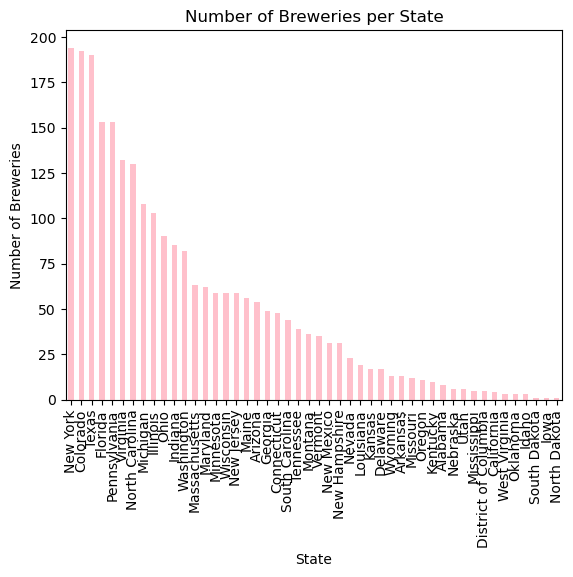

In [9]:
# plot Breweries per State
data_count = merged_df["state_x"].value_counts()
plot_pandas = data_count.plot.bar(color='pink')  
plt.xlabel("State")
plt.ylabel("Number of Breweries")
plt.title("Number of Breweries per State")
plt.savefig("./data/perState.png")

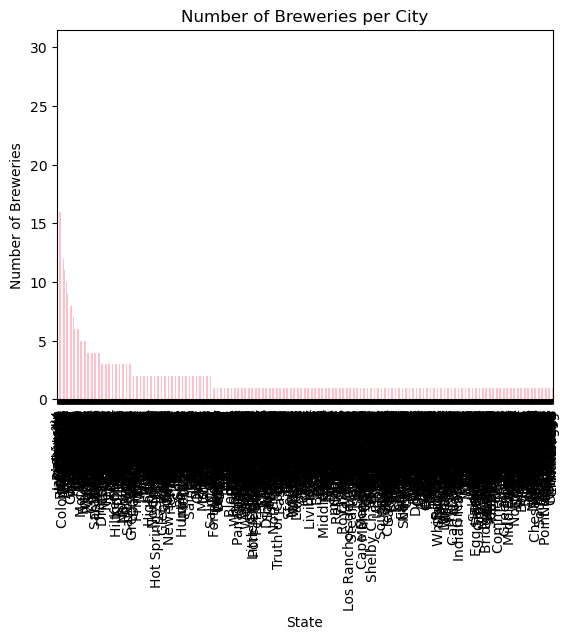

In [22]:
# Plot breweries by city
data_count2 = merged_df["City"].value_counts()
plot_pandas2 = data_count2.plot.bar(color='pink')
plt.xlabel("State")
plt.ylabel("Number of Breweries")
plt.title("Number of Breweries per City")
plot_pandas2.plot(figsize=(1000, 100000))
plt.savefig("./data/perCity.png")

In [14]:
brewery_type_per_state = merged_df.groupby(["state_x"])["brewery_type"].value_counts()

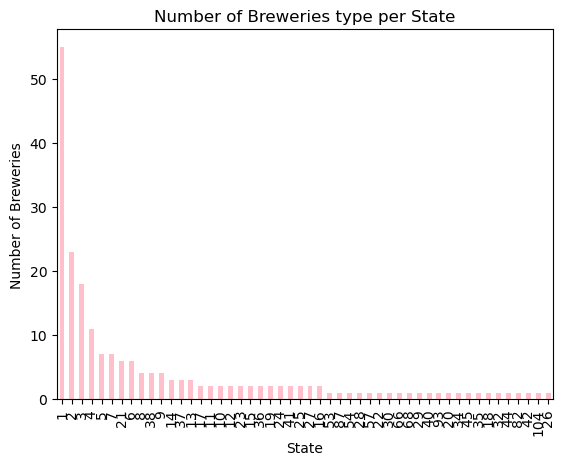

In [18]:
# plot Breweries type per State 
##data_count3 = brewery_type_per_state.value_counts()
#plot_pandas = data_count3.plot.bar(color='pink')  
#plt.xlabel("State")
#plt.ylabel("Number of Breweries")
##plt.title("Number of Breweries type per State")
plt.savefig("./data/typeperState.png")



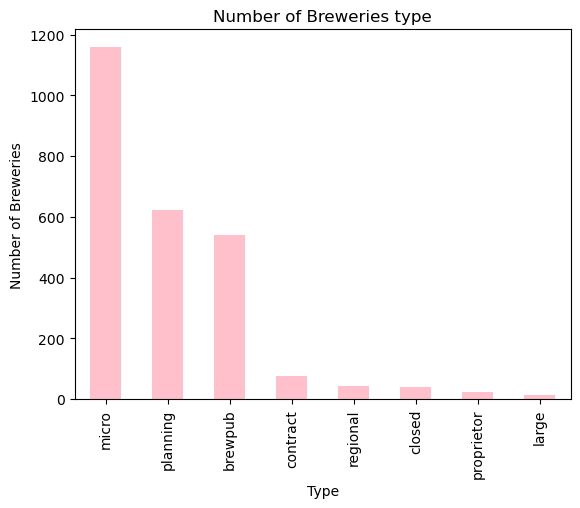

In [21]:
data_count4 = merged_df["brewery_type"].value_counts()
plot_pandas = data_count4.plot.bar(color='pink')  
plt.xlabel("Type")
plt.ylabel("Number of Breweries")
plt.title("Number of Breweries type")
plt.savefig("./data/type.png")